In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/cleaned_used_car_df.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           4009 non-null   int64  
 1   brand           4009 non-null   object 
 2   milage          4009 non-null   int64  
 3   fuel_type       3839 non-null   object 
 4   transmission    4009 non-null   object 
 5   ext_col         4009 non-null   object 
 6   int_col         4009 non-null   object 
 7   accident        3896 non-null   object 
 8   clean_title     3413 non-null   object 
 9   price           4009 non-null   int64  
 10  car_age         4009 non-null   int64  
 11  horsepower      3201 non-null   float64
 12  engine_size     3632 non-null   float64
 13  cylinder_count  3064 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 438.6+ KB


In [4]:
data = data.set_index('Index',drop=True)

In [5]:
data['brand'] = data['brand'].apply(lambda x: "Unknown" if data['brand'].value_counts()[x]<50 else x)

In [6]:
X = data.drop("price",axis=1)
y = data['price']

In [7]:
X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.3,random_state=42)

In [8]:
X_test, X_val, y_test, y_val = train_test_split(X_other,y_other, test_size=0.5,random_state=42)

In [9]:
X_train_copy = X_train.copy()

In [10]:
X_train.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,car_age,horsepower,engine_size,cylinder_count
Index,,,,,,,,,,,,
226,Mercedes-Benz,41000,Gasoline,Unknown,Grey,Black,None reported,Yes,7,563.0,5.5,8.0
2819,Subaru,116000,Gasoline,Automatic,Blue,Other,Accident reported,Yes,12,173.0,2.5,4.0
535,Unknown,25025,Gasoline,Automatic,White,Black,Accident reported,Yes,17,380.0,4.3,8.0
3193,Tesla,94100,NaN,Automatic,Black,Orange,Accident reported,Yes,8,518.0,NaN,NaN
3224,Ford,13856,NaN,Automatic,White,Black,None reported,Yes,3,480.0,NaN,NaN


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2806 entries, 226 to 3174
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2806 non-null   object 
 1   milage          2806 non-null   int64  
 2   fuel_type       2690 non-null   object 
 3   transmission    2806 non-null   object 
 4   ext_col         2806 non-null   object 
 5   int_col         2806 non-null   object 
 6   accident        2728 non-null   object 
 7   clean_title     2387 non-null   object 
 8   car_age         2806 non-null   int64  
 9   horsepower      2245 non-null   float64
 10  engine_size     2544 non-null   float64
 11  cylinder_count  2149 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 285.0+ KB


In [12]:
X_train.describe()

,milage,car_age,horsepower,engine_size,cylinder_count
count,2806.000000,2806.000000,2245.000000,2544.000000,2149.000000
mean,64346.616892,9.394155,333.448107,3.703046,6.249418
std,52338.826438,6.068829,123.996552,1.424418,1.678308
min,100.000000,1.000000,70.000000,0.650000,3.000000
25%,23020.750000,5.000000,248.000000,2.500000,5.000000
50%,52500.000000,8.000000,310.000000,3.500000,6.000000
75%,92965.250000,13.000000,400.000000,4.700000,8.000000
max,405000.000000,51.000000,1020.000000,8.300000,12.000000


## Handling Missing Values

In [13]:
percent_missing = 100*X_train.isna().sum()/len(X_train)
percent_missing[percent_missing>0]

fuel_type          4.133999
accident           2.779758
clean_title       14.932288
horsepower        19.992872
engine_size        9.337135
cylinder_count    23.414113
dtype: float64

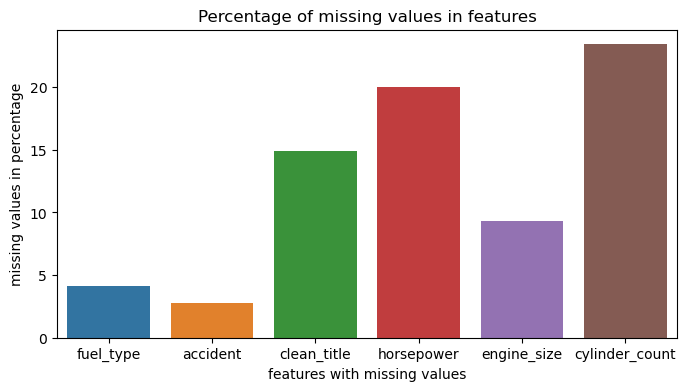

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(x=percent_missing[percent_missing>0].index,y=percent_missing[percent_missing>0])
plt.xlabel("features with missing values")
plt.ylabel("missing values in percentage")
plt.title("Percentage of missing values in features")
plt.show()

In [15]:
X_train['fuel_type'] = X_train['fuel_type'].fillna("Unknown")

In [16]:
X_train['accident'] = X_train['accident'].fillna("Unknown")

In [17]:
X_train['clean_title'] = X_train['clean_title'].fillna("Unknown")

<Axes: xlabel='horsepower', ylabel='Count'>

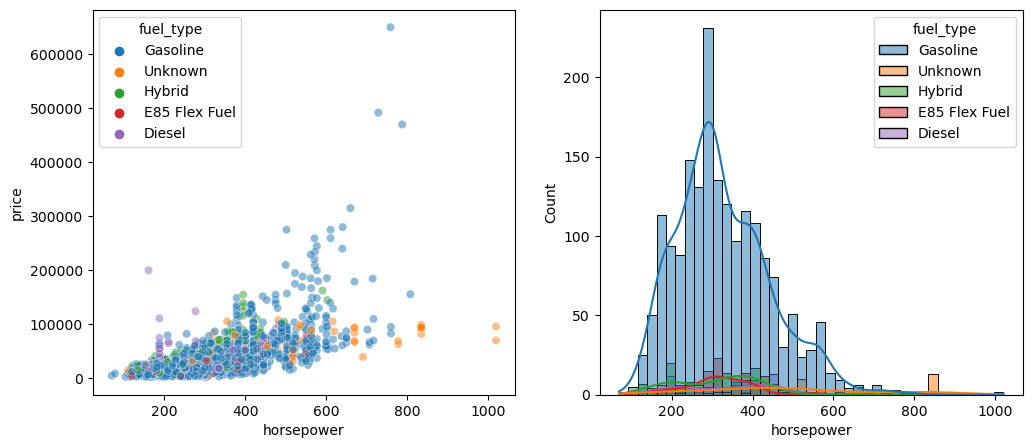

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x=X_train['horsepower'],y=y_train,hue=X_train['fuel_type'],alpha=0.5,ax=axes[0])
sns.histplot(x=X_train['horsepower'],kde=True,hue=X_train['fuel_type'],ax=axes[1])

<Axes: xlabel='engine_size', ylabel='Count'>

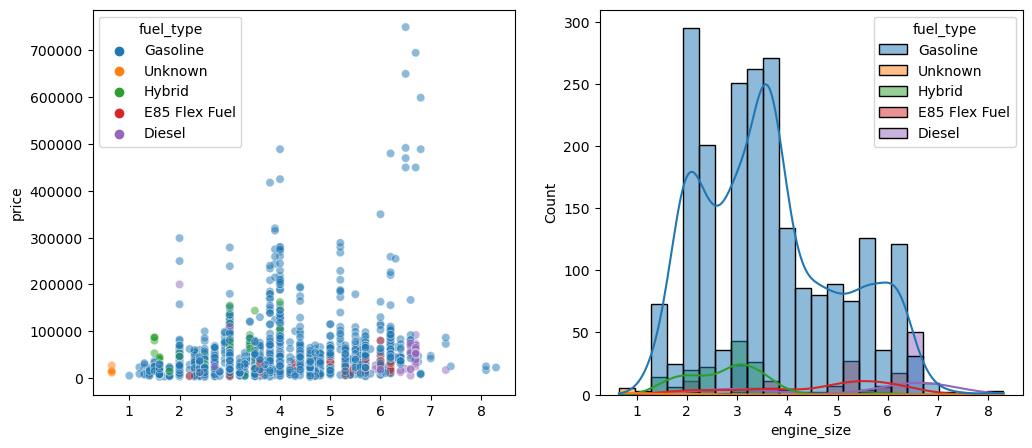

In [19]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='engine_size',y=y_train,data=X_train,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.histplot(x='engine_size',data=X_train,kde=True,hue='fuel_type',ax=axes[1])

<Axes: xlabel='cylinder_count', ylabel='price'>

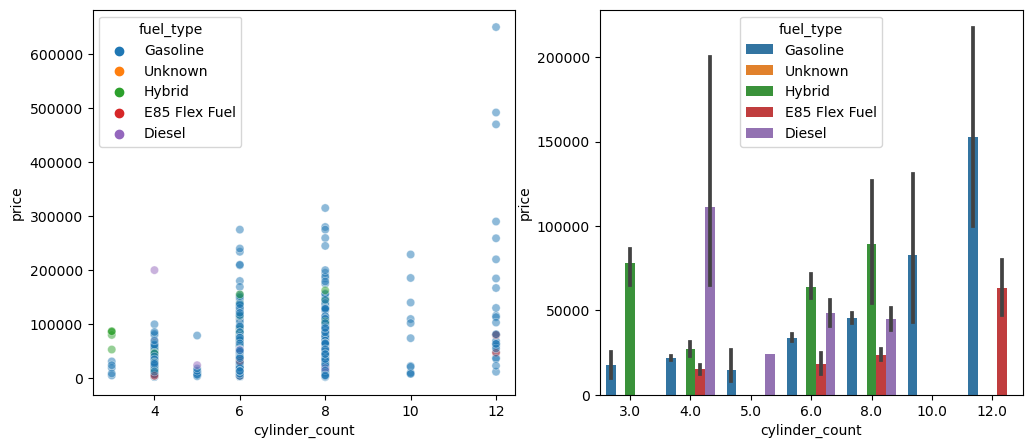

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='cylinder_count',y=y_train,data=X_train,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.barplot(x='cylinder_count',y=y_train,data=X_train,hue='fuel_type',ax=axes[1])

In [21]:
X_train.groupby('fuel_type').mean(numeric_only=True)

,milage,car_age,horsepower,engine_size,cylinder_count
fuel_type,,,,,
Diesel,88331.090909,9.079545,331.736842,5.375294,6.922078
E85 Flex Fuel,106610.100000,11.490000,318.085106,4.666667,7.085106
Gasoline,65071.935764,9.657552,327.814293,3.664027,6.253521
Hybrid,39155.921212,5.418182,312.643939,2.775524,5.204545
Unknown,38496.604027,8.503356,486.843750,1.035714,NaN


In [22]:
from sklearn.impute import SimpleImputer

In [23]:
impute_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

In [24]:
impute_mean.fit(X_train[['horsepower','engine_size','cylinder_count']])

SimpleImputer()

In [25]:
X_train[['horsepower','engine_size','cylinder_count']] = impute_mean.transform(X_train[['horsepower','engine_size','cylinder_count']])

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2806 entries, 226 to 3174
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2806 non-null   object 
 1   milage          2806 non-null   int64  
 2   fuel_type       2806 non-null   object 
 3   transmission    2806 non-null   object 
 4   ext_col         2806 non-null   object 
 5   int_col         2806 non-null   object 
 6   accident        2806 non-null   object 
 7   clean_title     2806 non-null   object 
 8   car_age         2806 non-null   int64  
 9   horsepower      2806 non-null   float64
 10  engine_size     2806 non-null   float64
 11  cylinder_count  2806 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 285.0+ KB


## Dealing With outliers

C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


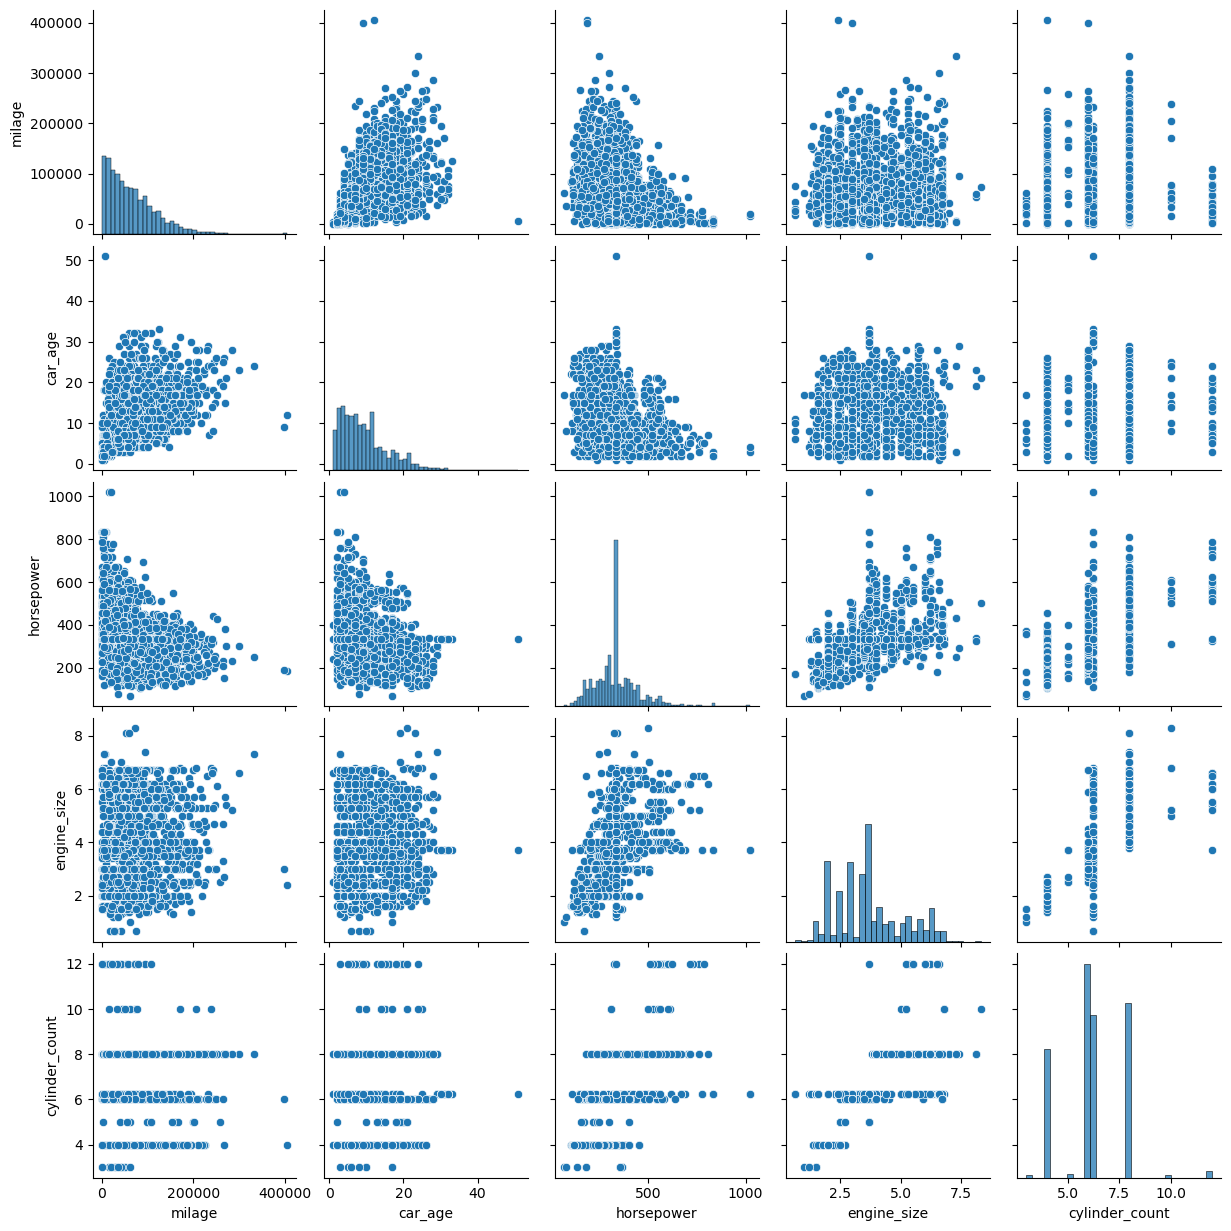

In [27]:
sns.pairplot(X_train)

<Axes: xlabel='price'>

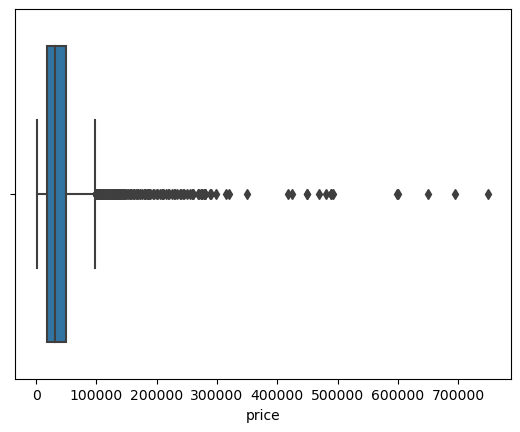

In [28]:
sns.boxplot(x=y_train)

In [29]:
from sklearn.preprocessing import FunctionTransformer

In [30]:
log_transformer = FunctionTransformer(np.log1p,inverse_func=np.expm1)

In [31]:
y_train = log_transformer.transform(y_train)

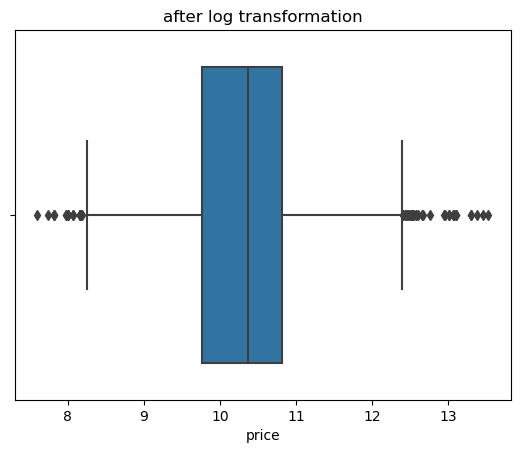

In [32]:
sns.boxplot(x=y_train)
plt.title('after log transformation')
plt.show()

## Correlation

In [33]:
pd.concat([X_train,y_train],axis=1).corr(numeric_only=True)['price']

milage           -0.713993
car_age          -0.635728
horsepower        0.589108
engine_size       0.265150
cylinder_count    0.273093
price             1.000000
Name: price, dtype: float64

<Axes: >

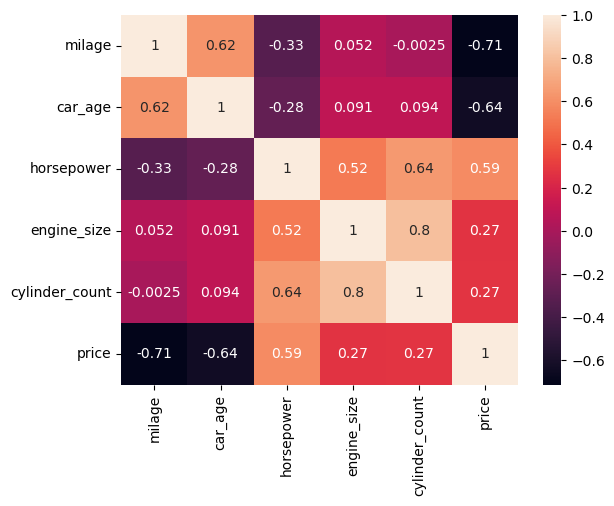

In [34]:
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr(numeric_only=True),annot=True)

## Scaling down the Data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(X_train[['milage','car_age','engine_size','horsepower','cylinder_count']])

StandardScaler()

In [38]:
X_train[['milage','car_age','engine_size','horsepower','cylinder_count']] = scaler.transform(X_train[['milage','car_age','engine_size','horsepower','cylinder_count']])

## Dealing With Categorical Columns and Column Transforming features
# **Fix the Problem _UnknownFiller_**

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

In [41]:
class UnknownFiller(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
        
    def transform(self,X,y=None):
        X_ = X.copy()
        X_['fuel_type'] = X_['fuel_type'].fillna("Unknown")
        X_['accident'] = X_['accident'].fillna("Unknown")
        X_['clean_title'] = X_['clean_title'].fillna("Unknown")

        return X_

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
transformer = ColumnTransformer(
    [('unknown_filler', UnknownFiller(), ['fuel_type','accident','clean_title']),
     ('imputer', SimpleImputer(missing_values=np.nan,strategy='mean'), ['horsepower','engine_size','cylinder_count']),
     ('categories', OneHotEncoder(drop='first',sparse_output=False), ['brand','fuel_type','transmission','ext_col','int_col','accident','clean_title']),
     ('scaler', StandardScaler(), ['milage','car_age','engine_size','horsepower','cylinder_count'])],
    remainder='passthrough', verbose_feature_names_out=False
)

In [44]:
transformer.fit(X_train_copy)

ColumnTransformer(remainder='passthrough',
                  transformers=[('unknown_filler', UnknownFiller(),
                                 ['fuel_type', 'accident', 'clean_title']),
                                ('imputer', SimpleImputer(),
                                 ['horsepower', 'engine_size',
                                  'cylinder_count']),
                                ('categories',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['brand', 'fuel_type', 'transmission',
                                  'ext_col', 'int_col', 'accident',
                                  'clean_title']),
                                ('scaler', StandardScaler(),
                                 ['milage', 'car_age', 'engine_size',
                                  'horsepower', 'cylinder_count'])],
                  verbose_feature_names_out=False)

In [45]:
transformed_X_train = transformer.transform(X_train_copy)

In [46]:
transformed_X_test = transformer.transform(X_test)

In [47]:
transformed_X_val = transformer.transform(X_val)

In [59]:
transformed_X_val[0]

array(['Gasoline', 'Accident reported', 'Yes', 240.0, 2.0, 4.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.547251234023589, 0.0998467130367248,
       -1.1958434359276477, -0.7538026243950385, -1.3406010681838858],
      dtype=object)

## Creating transformer for Target [TransformedTargetRegressor]

In [53]:
y_test = log_transformer.transform(y_test)
y_val = log_transformer.transform(y_val)

# Model Building

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
lr_model = LinearRegression()